#  AI CA4 Dicision Tree and Random Forest 

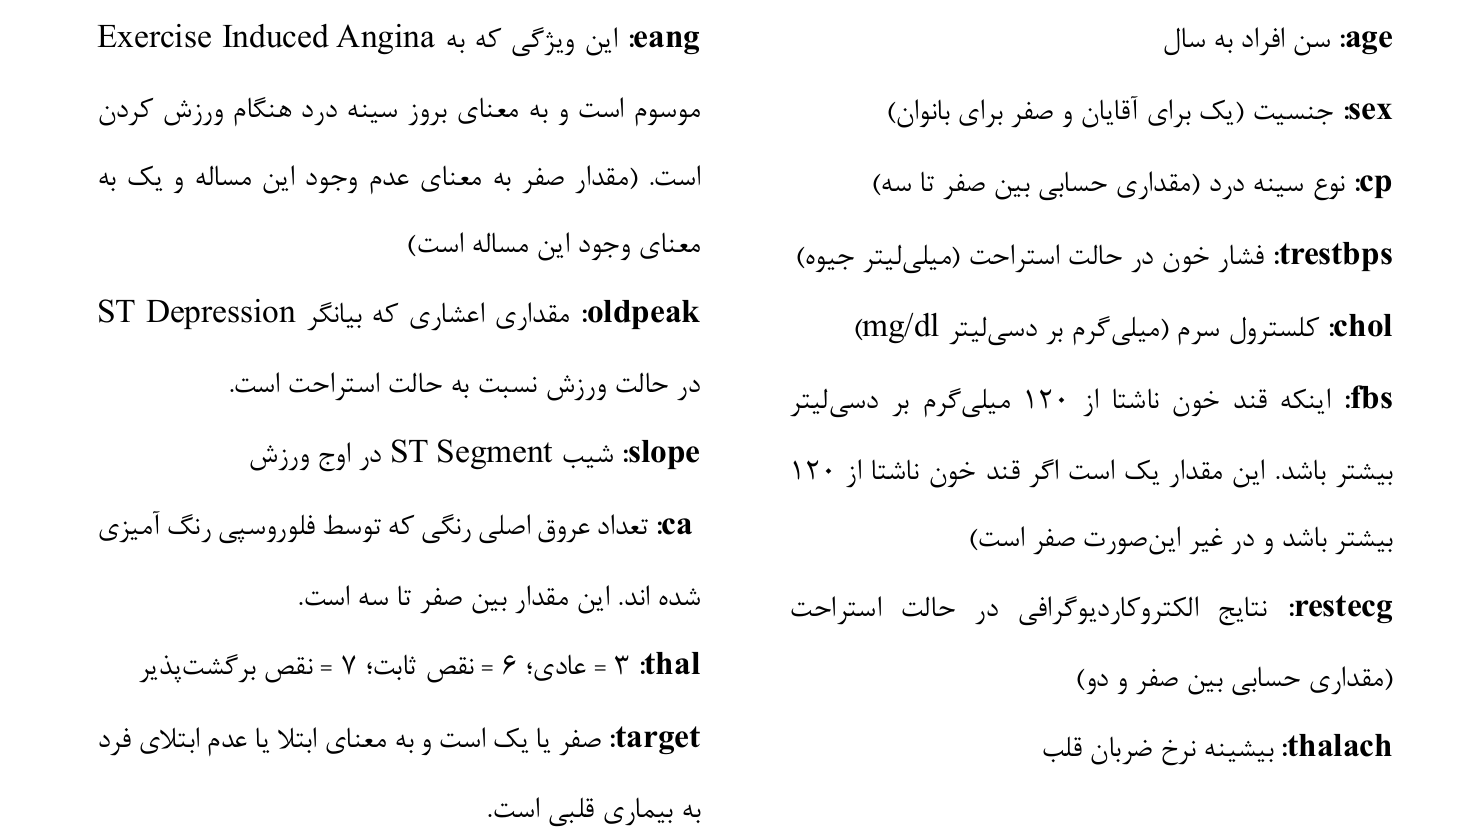


 Above you can see all features which we will work with to get to the model in which we can predict the target value according to features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline


Use pandas to read data.csv as a dataframe called data

In [2]:
data = pd.read_csv('data.csv')
columns = data.columns
values = data.values



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [5]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

Train Test Split and Training a Decision Tree Model. we split 20% of data for test and 80% of it for train.At the end we use this test data for calculating precision for random forest.

# Decision Tree

In [6]:
def make_decision_tree(data , size , state):
    X = data.drop('target',axis=1)
    y = data['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state = state)
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    return dtree , X_test , X_train , y_train , y_test

In [7]:
dtree , X_test , X_train , y_train , y_test = make_decision_tree(data ,0.2 , 101)

According to decision tree we predict target in datas in X_test and store it in predictions.


In [8]:
predictions = dtree.predict(X_test)


In [9]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        31
           1       0.78      0.83      0.81        30

   micro avg       0.80      0.80      0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



# Random Forest
# part 2

In this part we get the X_train in the previos part and devide it to 5 subsets of 150 data entries randomly with replacement.actually these subsets is our train data for making 5 trees.


after creating five decision tree with five different subsets we give test data to them and with the help of voter we predict the result of each enty. predict result will be maximum value of each trees.then we calculate precision. data test is 20% of data which we split it at first.

In [10]:
def bagging(X_train , y_train,  X_test , y_test):
    data_train = pd.concat([X_train , y_train] , axis = 1)
    
    data1 = data_train.sample(n = 151 , replace =True , random_state = 1)
    data2 = data_train.sample(n = 151 , replace = True ,random_state = 2)
    data3 = data_train.sample(n = 151 , replace = True ,random_state = 3)
    data4 = data_train.sample(n = 151 , replace = True ,random_state = 4)
    data5 = data_train.sample(n = 151 , replace = True ,random_state = 5)

    dtree1 , X_test1 , X_train1 , y_train1 , y_test1 =  make_decision_tree(data1 , 1 , 1)
    dtree2 , X_test2 , X_train2 , y_train2 , y_test2 =  make_decision_tree(data2 ,1 , 2)
    dtree3 , X_test3 , X_train3 , y_train3 , y_test3 =  make_decision_tree(data3 , 1 , 3)
    dtree4 , X_test4 , X_train4 , y_train4 , y_test4 =  make_decision_tree(data4 , 1 , 4)
    dtree5 , X_test1 , X_train1 , y_train1 , y_test1 =  make_decision_tree(data1 , 1 , 5)
    

    predict1 = dtree1.predict(X_test)
    predict2 = dtree2.predict(X_test)
    predict3 = dtree3.predict(X_test)
    predict4 = dtree4.predict(X_test)
    predict5 = dtree5.predict(X_test)

    y_predict_random_forest = []
   
    for i in range(len(y_test)):
        num = [0 , 0]
        num [predict1[i]]+=1
        num [predict2[i]]+=1
        num [predict3[i]]+=1
        num [predict4[i]]+=1
        num [predict5[i]]+=1
        
        if num[0] > num[1]:
            y_predict_random_forest.append(0)
        else:
            y_predict_random_forest.append(1)
        
    print(classification_report(y_test,y_predict_random_forest))



bagging(X_train, y_train, X_test , y_test)


              precision    recall  f1-score   support

           0       1.00      0.74      0.85        31
           1       0.79      1.00      0.88        30

   micro avg       0.87      0.87      0.87        61
   macro avg       0.89      0.87      0.87        61
weighted avg       0.90      0.87      0.87        61



# part 3

In this part at fisrt for each columns or better to say each feature of our data we delete it from data and again do the same as we have done in part 2. 


In [11]:
for feature in columns:
    if feature!='target':
        print(feature + " is deleted\n")
        data_new = data.drop([feature] , axis = 1)
        X = data_new.drop('target',axis=1)
        y = data_new['target']
        X_train_new , X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=.2, random_state=101)
        bagging(X_train_new ,y_train_new ,  X_test_new , y_test_new)
        print("\n\n")
        
    
    
    
    

    

age is deleted

              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.78      0.97      0.87        30

   micro avg       0.85      0.85      0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61




sex is deleted

              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.78      0.97      0.87        30

   micro avg       0.85      0.85      0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61




cp is deleted

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.80      0.93      0.86        30

   micro avg       0.85      0.85      0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.

# part 4 and 5


in this part we impliment random forest by choosing randomly 5 attributes and then as same as the previos part we calculate precision of model.

In [12]:
def random_forest(data):
    y = data['target']
    df = data.drop('target',axis=1)
    X = df.sample(5 , axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=101)
    bagging(X_train ,y_train, X_test , y_test)
   



In [13]:
random_forest(data)

              precision    recall  f1-score   support

           0       0.66      0.61      0.63        31
           1       0.62      0.67      0.65        30

   micro avg       0.64      0.64      0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61



# Extra

In [14]:
from IPython.display import display , Image
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call
import pydotplus 
% matplotlib inline



In [15]:
iris = load_iris()
feature_names = columns[:13]
target_names = 'target'


In [16]:
feature_names

Index([u'age', u'sex', u'cp', u'trestbps', u'chol', u'fbs', u'restecg',
       u'thalach', u'exang', u'oldpeak', u'slope', u'ca', u'thal'],
      dtype='object')

In [17]:
target_names

'target'

In [18]:
model = RandomForestClassifier(n_estimators = 10)
model.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
estimator = model.estimators_[5]

In [20]:
export_graphviz(estimator , out_file = 'tree.dot' ,
                feature_names = feature_names,
                class_names = target_names ,
                rounded = True , proportion = False ,
                precision = 2 , filled = True)

In [21]:
call(['dot' , '-Tpng' , 'tree.dot' , '-o' , 'tree.png' , '-Gdpi=600'] )

0

In [22]:
Image(filename = 'tree.png')

# Qestions 

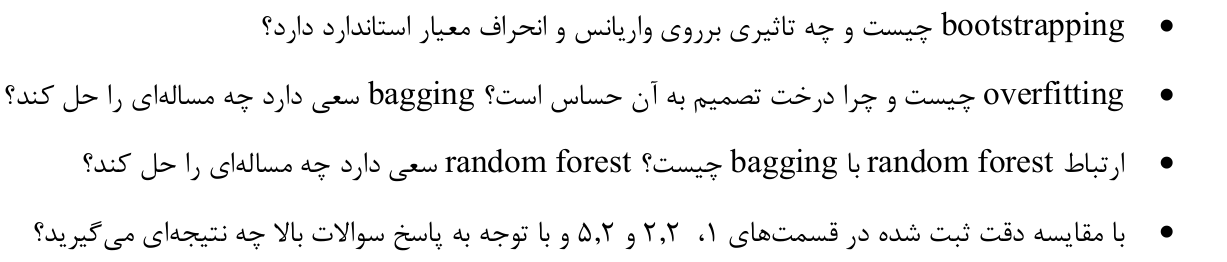 